<a href="https://colab.research.google.com/github/daeyeong8855/statistical_data_analysis/blob/main/%ED%86%B5%EA%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA 모델은 시계열 데이터의 자동회귀(AR) 성분, 차분(Differencing) 성분, 이동평균(MA) 성분을 모두 고려하여 시계열 패턴을 모델링합니다..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

data.loc[50:150, 'Value'] = np.nan
print(data.loc[50:150])

          Date  Value
50  2023-02-20    NaN
51  2023-02-21    NaN
52  2023-02-22    NaN
53  2023-02-23    NaN
54  2023-02-24    NaN
..         ...    ...
146 2023-05-27    NaN
147 2023-05-28    NaN
148 2023-05-29    NaN
149 2023-05-30    NaN
150 2023-05-31    NaN

[101 rows x 2 columns]


order=(1,1,1) 매개변수를 사용하여 ARIMA 모델을 설정합니다. order 매개변수는 AR, 차분(Differencing), MA 성분을 지정합니다. 여기서 (1,1,1)은 AR(1) 모델, 차분(degree of differencing)이 1, 그리고 MA(1) 모델을 의미합니다.

In [5]:
model = ARIMA(data['Value'].dropna(), order=(1,1,1))
model_fit = model.fit()

data.loc[50:150, 'value temp'] = model_fit.predict(start=50, end=2000)
print(data[50:150])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


          Date  Value  value temp
50  2023-02-20    NaN    0.064866
51  2023-02-21    NaN    0.077801
52  2023-02-22    NaN    0.127776
53  2023-02-23    NaN    0.025362
54  2023-02-24    NaN    0.112278
..         ...    ...         ...
145 2023-05-26    NaN   -0.004256
146 2023-05-27    NaN    0.098284
147 2023-05-28    NaN    0.073398
148 2023-05-29    NaN    0.068614
149 2023-05-30    NaN    0.104114

[100 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


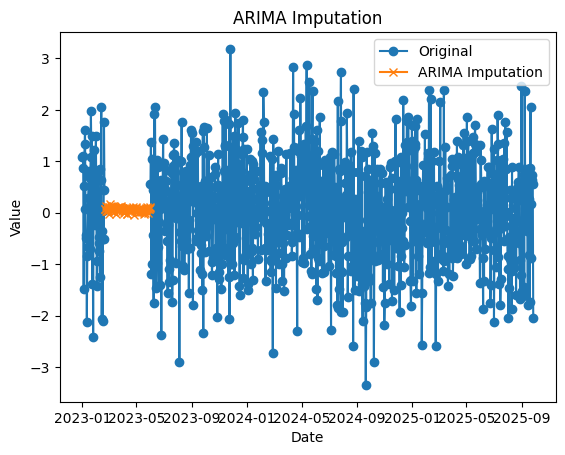

In [6]:
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['value temp'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()